Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from math import sqrt

Import the set containing the data

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(data_url)

Naming the colomns

In [3]:
data.columns = [
    "Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area",
    "Overall_Height", "Orientation", "Glazing_Area", "Glazing_Area_Distribution",
    "Heating_Load", "Cooling_Load"
]

Check and fill values

In [4]:
if data.isnull().sum().any():
    data.fillna(method='ffill', inplace=True)

Matrix formation

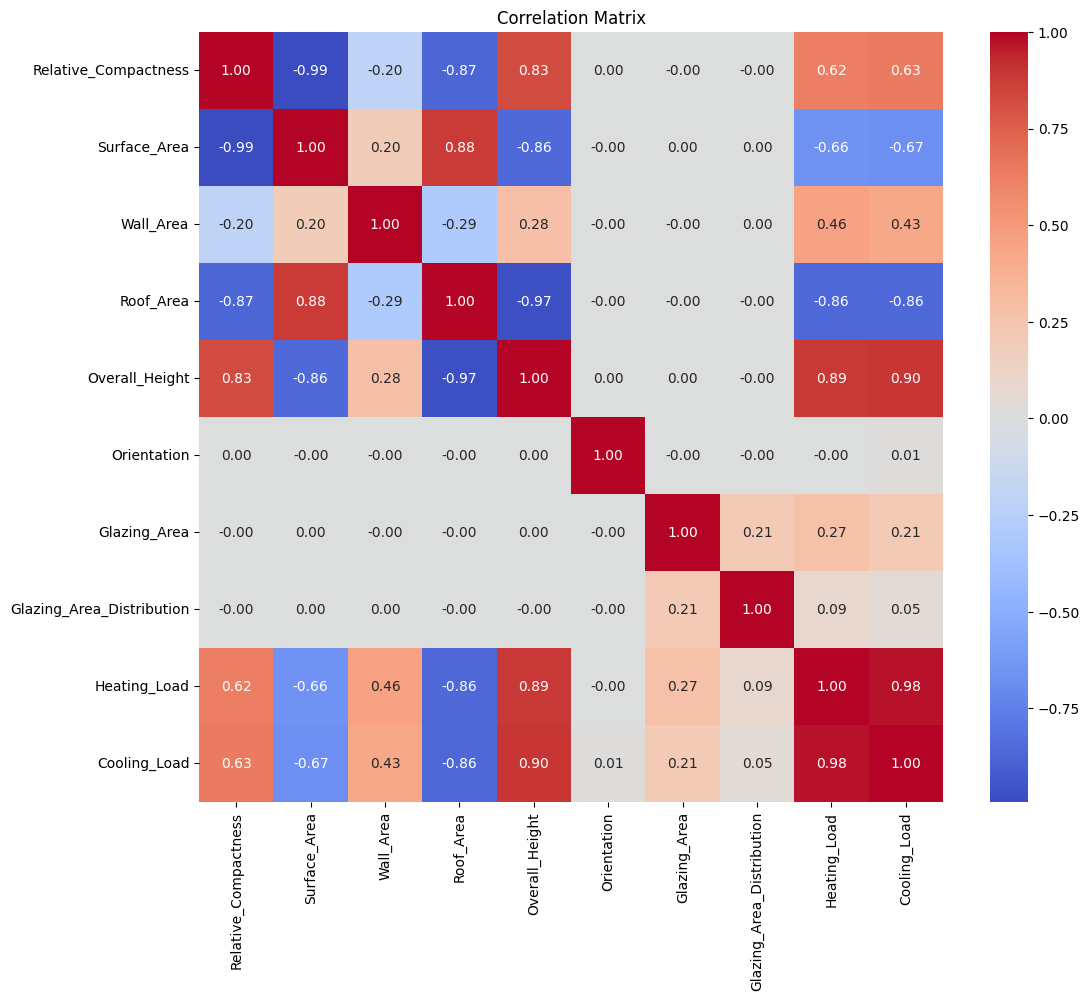

In [5]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

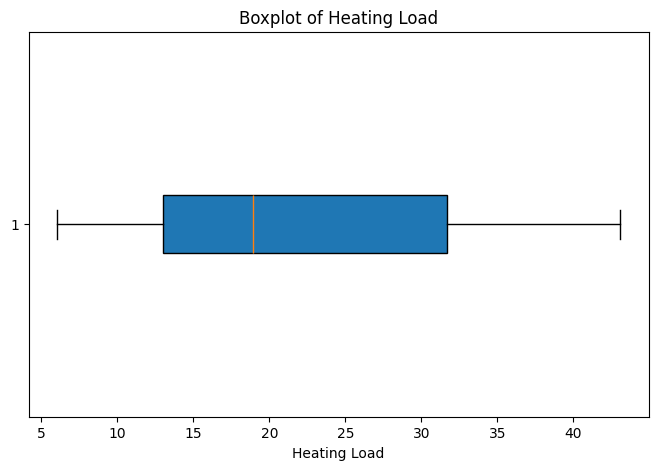

In [6]:
plt.figure(figsize=(8, 5))
plt.boxplot(data["Heating_Load"], vert=False, patch_artist=True)
plt.title("Boxplot of Heating Load")
plt.xlabel("Heating Load")
plt.show()

In [7]:
X = data.drop(columns=["Heating_Load", "Cooling_Load"])
y = data["Heating_Load"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_np = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_np = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

In [11]:
weights = np.zeros(X_train_np.shape[1])

In [12]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    for i in range(iterations):
        predictions = np.dot(X, weights)
        errors = predictions - y
        gradients = (1/m) * np.dot(X.T, errors)
        weights -= learning_rate * gradients
        if i % 100 == 0:  # Debugging: Print progress
            mse = np.mean(errors**2)
            print(f"Iteration {i}: MSE={mse:.4f}")
    return weights

weights = gradient_descent(X_train_np, y_train.values, weights, learning_rate=0.01, iterations=1000)
y_pred_manual = np.dot(X_test_np, weights)

Iteration 0: MSE=591.7694
Iteration 100: MSE=79.5705
Iteration 200: MSE=20.0886
Iteration 300: MSE=11.9681
Iteration 400: MSE=10.6917
Iteration 500: MSE=10.3490
Iteration 600: MSE=10.1486
Iteration 700: MSE=9.9826
Iteration 800: MSE=9.8349
Iteration 900: MSE=9.7021


In [13]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_sklearn = linear_model.predict(X_test_scaled)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [14]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}\n")

evaluate_model(y_test, y_pred_manual, "Manual Linear Regression")
evaluate_model(y_test, y_pred_sklearn, "Sklearn Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Manual Linear Regression Performance:
MSE: 11.04, RMSE: 3.32, R2: 0.89

Sklearn Linear Regression Performance:
MSE: 9.15, RMSE: 3.03, R2: 0.91

Ridge Regression Performance:
MSE: 9.21, RMSE: 3.04, R2: 0.91

Lasso Regression Performance:
MSE: 9.94, RMSE: 3.15, R2: 0.90



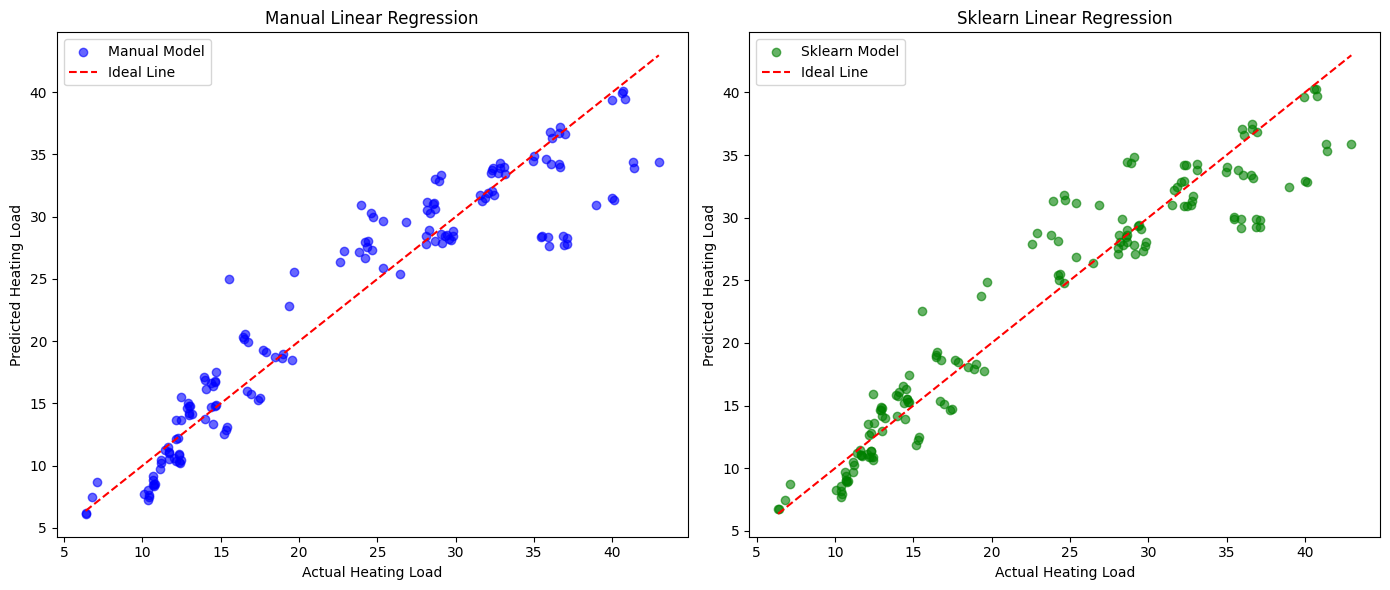

In [15]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_manual, color='blue', label='Manual Model', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Manual Linear Regression')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sklearn, color='green', label='Sklearn Model', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Sklearn Linear Regression')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': linear_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

print("\nEnergy Efficiency Suggestions:")
print("1. Focus on optimizing Relative Compactness, which has the largest positive impact on Heating Load.")
print("2. Minimize Surface Area and Roof Area to reduce heat loss.")
print("3. Experiment with different Glazing Area and Orientation to achieve energy balance.")


Feature Importance:
                     Feature  Coefficient
4             Overall_Height     7.215464
6               Glazing_Area     2.700051
2                  Wall_Area     0.795339
7  Glazing_Area_Distribution     0.327345
5                Orientation    -0.035934
1               Surface_Area    -3.604586
3                  Roof_Area    -3.917367
0       Relative_Compactness    -6.517601

Energy Efficiency Suggestions:
1. Focus on optimizing Relative Compactness, which has the largest positive impact on Heating Load.
2. Minimize Surface Area and Roof Area to reduce heat loss.
3. Experiment with different Glazing Area and Orientation to achieve energy balance.
